In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Configurando o max_columns no pandas
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)

### Analysis de homicídio
Os dados foram extraídos da Secretaria de Segurança de São Paulo [SSP](http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx) no perído de 2017-2022

In [2]:
# Realizando a leitura para cada aba da planilha disponibilizada pela SSP
df_2017 = pd.read_excel("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Homicidios\\Homicidio_2017_2022.xlsx", sheet_name='2017')
df_2018 = pd.read_excel("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Homicidios\\Homicidio_2017_2022.xlsx", sheet_name='2018')
df_2019 = pd.read_excel("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Homicidios\\Homicidio_2017_2022.xlsx", sheet_name='2019')
df_2020 = pd.read_excel("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Homicidios\\Homicidio_2017_2022.xlsx", sheet_name='2020')
df_2021 = pd.read_excel("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Homicidios\\Homicidio_2017_2022.xlsx", sheet_name='2021')
df_2022 = pd.read_excel("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Homicidios\\Homicidio_2017_2022.xlsx", sheet_name='2022')


C:\Users\gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
df = pd.DataFrame()
df = pd.concat([df, df_2017])
df = pd.concat([df, df_2018])
df = pd.concat([df, df_2019])
df = pd.concat([df, df_2020])
df = pd.concat([df, df_2021])
df = pd.concat([df, df_2022])

In [4]:
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2017,2017-01-21,440,2017,S.PAULO,02º D.P. BOM RETIRO,DEL.SEC.1º CENTRO,DECAP,2017-01-21,17:15:00,Via pública,PRAÇA DA LUZ,1.0,-23.535135,-46.633779,Vítima,Masculino,NaN,NaT,Parda,NaN,HOMICÍDIO DOLOSO
1,DECAP,1ª SEC,São Paulo,012 DP - Pari,1.0,1,10108,1,2017,2017-01-24,489,2017,S.PAULO,08º D.P. BRAS,DEL.SEC.1º CENTRO,DECAP,2017-01-24,16:32:00,Via pública,RUA JOAQUIM CARLOS,1379.0,-23.524742,-46.608382,Vítima,Masculino,NaN,NaT,Preta,NaN,HOMICÍDIO DOLOSO
2,DECAP,2ª SEC,São Paulo,035 DP - Jabaquara,1.0,1,10216,1,2017,2017-01-15,470,2017,S.PAULO,16º D.P. VILA CLEMENTINO,DEL.SEC.2º SUL,DECAP,2017-01-15,01:14:00,Via pública,TRAVESSA JUPATIS,110.0,-23.652974,-46.649025,Vítima,Masculino,33.0,1983-09-05,Parda,DESEMPREGADO,HOMICÍDIO DOLOSO
3,DECAP,2ª SEC,São Paulo,097 DP - Americanópolis,1.0,1,10226,1,2017,2017-01-01,19,2017,S.PAULO,26º D.P. SACOMA,DEL.SEC.2º SUL,DECAP,2017-01-01,16:19:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,61.0,1955-11-06,Parda,APOSENTADO(A),HOMICÍDIO DOLOSO
4,DECAP,3ª SEC,São Paulo,034 DP - Vila Sonia,1.0,1,10356,1,2017,2017-01-01,2,2017,S.PAULO,89º D.P. JARDIM TABOAO,DEL.SEC.3º OESTE,DECAP,2017-01-01,00:37:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Autor/Vitima,Masculino,19.0,1997-01-21,Parda,SEM PROFISSAO DEFINIDA,HOMICÍDIO DOLOSO


In [5]:
df.tail()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
3039,DEMACRO,SEC Taboão da Serra,Itapecerica da Serra,DM - Itapecerica da Serra,1.0,1,30406,12,2022,2022-12-10,4295,2022,ITAPECERICA DA SERRA,DEL.POL.ITAPECERICA DA SERRA,DEL.SEC.TABOÃO DA SERRA,DEMACRO,2022-12-09,22:10:00,Via pública,Rodovia Prefeito Bento Rotger Domingues,2305.0,-23.750834,-46.843815,Autor/Vitima,Masculino,23,1999-07-15,Parda,AUTONOMO(A),HOMICÍDIO DOLOSO
3040,DEMACRO,SEC Taboão da Serra,Itapecerica da Serra,DM - Itapecerica da Serra,1.0,1,30406,12,2022,2022-12-18,4399,2022,ITAPECERICA DA SERRA,DEL.POL.ITAPECERICA DA SERRA,DEL.SEC.TABOÃO DA SERRA,DEMACRO,2022-12-17,21:39:00,Via pública,RUA TAMBE,203.0,-23.687628,-46.857262,Vítima,Masculino,60,1962-03-10,Branca,NaN,HOMICÍDIO DOLOSO
3041,DEMACRO,SEC Taboão da Serra,Taboão da Serra,001 DP - Taboão da Serra,1.0,1,30614,12,2022,2022-12-15,3921,2022,TABOAO DA SERRA,01º D.P. TABOÃO DA SERRA,DEL.SEC.TABOÃO DA SERRA,DEMACRO,2022-12-14,23:53:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Masculino,30,1992-10-05,Parda,PEDREIRO,HOMICÍDIO DOLOSO
3042,DEMACRO,SEC Taboão da Serra,Taboão da Serra,002 DP - Taboão da Serra,1.0,1,30614,12,2022,2022-12-22,4014,2022,TABOAO DA SERRA,01º D.P. TABOÃO DA SERRA,DEL.SEC.TABOÃO DA SERRA,DEMACRO,2022-12-21,17:32:00,Via pública,RUA VINTE E CINCO DE JANEIRO,100.0,-23.636569,-46.796648,Vítima,Masculino,54,1968-04-02,Preta,POLICIAL MILITAR,HOMICÍDIO DOLOSO
3043,DEMACRO,SEC Taboão da Serra,Taboão da Serra,002 DP - Taboão da Serra,1.0,1,30614,12,2022,2022-12-24,4048,2022,TABOAO DA SERRA,01º D.P. TABOÃO DA SERRA,DEL.SEC.TABOÃO DA SERRA,DEMACRO,2022-12-23,23:48:00,Via pública,ESTRADA KIZAEMON TAKEUTI,749.0,-23.633967,-46.783963,Vítima,Masculino,45,1977-05-18,Branca,OUTROS,HOMICÍDIO DOLOSO


In [6]:
df.shape

(18445, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18445 entries, 0 to 3043
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  18445 non-null  object        
 1   SECCIONAL_CIRCUNSCRICAO     18445 non-null  object        
 2   MUNICIPIO_CIRCUNSCRICAO     18445 non-null  object        
 3   DP_CIRCUNSCRICAO            18445 non-null  object        
 4   HD                          17536 non-null  float64       
 5   Nº DE VÍT HD                18445 non-null  int64         
 6   ID_DELEGACIA                18445 non-null  int64         
 7   MÊS ESTATISTICA             18445 non-null  int64         
 8   ANO ESTATISTICA             18445 non-null  int64         
 9   DATAHORA_REGISTRO_BO        18445 non-null  datetime64[ns]
 10  NUM_BO                      18445 non-null  object        
 11  ANO_BO                      18445 non-null  int64         
 

In [8]:
df.describe()

,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,ANO_BO,DATA_FATO,LATITUDE,LONGITUDE,DATA_NASCIMENTO_PESSOA
count,17536.0,18445.0,18445.000000,18445.000000,18445.000000,18445,18445.000000,18445,13284.000000,13285.000000,16240
mean,1.0,1.0,69387.838601,6.493413,2019.420168,2019-12-02 00:34:13.390094336,2019.421361,2019-12-01 09:16:14.898346496,-23.064318,-47.043922,1984-02-15 00:26:57.339901504
min,1.0,1.0,10004.000000,1.000000,2017.000000,2017-01-01 00:00:00,2017.000000,2016-01-19 00:00:00,-25.013276,-52.946693,1900-01-04 00:00:00
25%,1.0,1.0,30204.000000,3.000000,2018.000000,2018-05-06 00:00:00,2018.000000,2018-05-05 00:00:00,-23.613530,-47.317517,1976-04-06 18:00:00
50%,1.0,1.0,60050.000000,6.000000,2019.000000,2019-12-04 00:00:00,2019.000000,2019-12-03 00:00:00,-23.453261,-46.754598,1985-09-12 12:00:00
75%,1.0,1.0,100911.000000,10.000000,2021.000000,2021-06-01 00:00:00,2021.000000,2021-05-31 00:00:00,-22.799955,-46.476308,1994-05-26 12:00:00
max,1.0,1.0,900593.000000,12.000000,2022.000000,2023-01-01 00:00:00,2023.000000,2022-12-31 00:00:00,0.000000,0.000000,2022-05-07 00:00:00
std,0.0,0.0,75779.164810,3.535491,1.737609,NaN,1.739566,NaN,0.885189,1.291568,NaN


#### Selecionando apenas colunas que podem gerar insights 

In [9]:
# Selecionando apenas colunas que podem gerar insights 
df_2 = df[['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO ', 'MÊS ESTATISTICA', 'ANO ESTATISTICA', 'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA']]

##### Renomeando as colunas

In [10]:
df_2 = df_2.rename(columns={'DEPARTAMENTO_CIRCUNSCRICAO': 'departamento_circunscricao', 'SECCIONAL_CIRCUNSCRICAO': 'seccional_circunscricao', 'MUNICIPIO_CIRCUNSCRICAO': 'municipio_circunscricao', 'DP_CIRCUNSCRICAO ': 'dp_circunscricao', 'MÊS ESTATISTICA': 'mes_estatistica', 'ANO ESTATISTICA': 'ano_estatistica', 'MUNICIPIO_ELABORACAO': 'municipio_elaboracao', 'DP_ELABORACAO': 'dp_elaboracao', 'SEC_ELABORACAO': 'sec_elaboracao', 'DESC_TIPOLOCAL': 'desc_tipo_local', 'LOGRADOURO': 'logradouro', 'NUMERO_LOGRADOURO': 'num_logradouro', 'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'TIPO_PESSOA': 'tp_pessoa', 'SEXO_PESSOA': 'sexo_pessoa', 'IDADE_PESSOA': 'idade_pessoa', 'DATA_NASCIMENTO_PESSOA': 'dt_nascimento_pessoa', 'COR_PELE': 'cor_pele', 'PROFISSAO': 'profissao', 'NATUREZA_APURADA': 'natureza_apurada'})

In [11]:
df_2.columns

Index(['departamento_circunscricao', 'seccional_circunscricao',
       'municipio_circunscricao', 'dp_circunscricao', 'mes_estatistica',
       'ano_estatistica', 'municipio_elaboracao', 'dp_elaboracao',
       'sec_elaboracao', 'desc_tipo_local', 'logradouro', 'num_logradouro',
       'latitude', 'longitude', 'tp_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nascimento_pessoa', 'cor_pele', 'profissao', 'natureza_apurada'],
      dtype='object')

#### Colunas com campos não preenchidos

<Axes: >

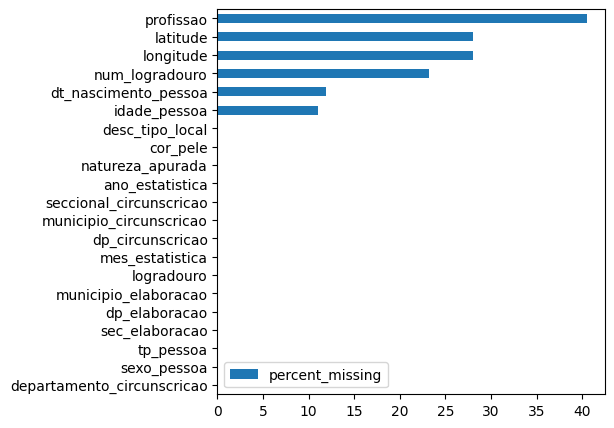

In [12]:
percent_missing = df_2.isnull().sum() * 100 / len(df_2)
qtde_registros_missing = df_2.isnull().sum()
missing_values =  pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by='percent_missing').plot(kind='barh', figsize=(5, 5))

### Analisando as variáveis

### Profissão
A variável descreve a profissão da vítima catalogada na hora do cadastramento do BO
##### Tratamentos
1. Valores cadastrados de formas deferentes (Via pública => via publica..)
##### Comentários
- Esta columna possui cerca de 40% do total da base em valores NULLS, porém podemos utilizar técnica de preenchimento de most_frequent.
- A coluna possui um grande preenchimento como "Não Informada"

In [13]:
df_2['profissao'].describe()

count             10981
unique              418
top       NAO INFORMADA
freq               1126
Name: profissao, dtype: object

In [14]:
df_2['profissao'].isna().value_counts()

profissao
False    10981
True      7464
Name: count, dtype: int64

<Axes: ylabel='profissao'>

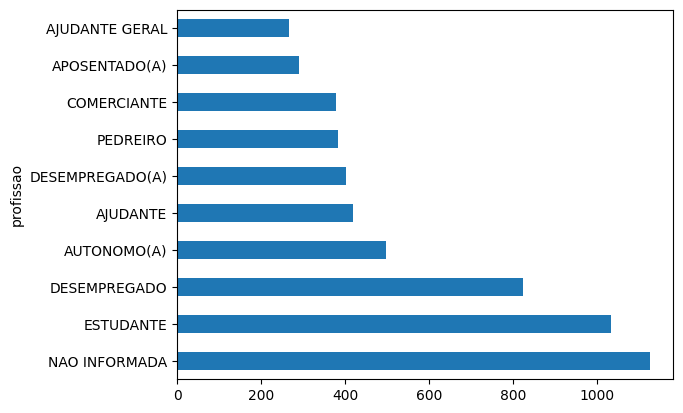

In [15]:
df_2['profissao'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh')

### Data de nascimento da vítima
A variável descreve a data de nascimento da vítima

#### Comentários
1. Existem indivíduos com data de nascimento porém com idade não preenchida

In [16]:
df_2['dt_nascimento_pessoa'].describe()

count                            16240
mean     1984-02-15 00:26:57.339901504
min                1900-01-04 00:00:00
25%                1976-04-06 18:00:00
50%                1985-09-12 12:00:00
75%                1994-05-26 12:00:00
max                2022-05-07 00:00:00
Name: dt_nascimento_pessoa, dtype: object

In [17]:
df_2['dt_nascimento_pessoa'].isna().value_counts()

dt_nascimento_pessoa
False    16240
True      2205
Name: count, dtype: int64

In [72]:
df_2[(df_2['dt_nascimento_pessoa'].isna()) & (df_2['idade_pessoa'].notna())].head()

,departamento_circunscricao,seccional_circunscricao,municipio_circunscricao,dp_circunscricao,mes_estatistica,ano_estatistica,municipio_elaboracao,dp_elaboracao,sec_elaboracao,desc_tipo_local,logradouro,num_logradouro,latitude,longitude,tp_pessoa,sexo_pessoa,idade_pessoa,dt_nascimento_pessoa,cor_pele,profissao,natureza_apurada
25,DECAP,5ª SEC,São Paulo,057 DP - Parque da Moóca,1,2017,S.PAULO,56º D.P. VILA ALPINA,DEL.SEC.5º LESTE,Via pública,RUA GUAPEVA,242.0,-23.552997,-46.577377,Vítima,Masculino,50.0,NaT,Branca,NaN,HOMICÍDIO DOLOSO
257,DEMACRO,SEC Guarulhos,Guarulhos,006 DP - Guarulhos,1,2017,GUARULHOS,06º D.P. GUARULHOS,DEL.SEC.GUARULHOS,Area não ocupada,RUA DOREZOPOLIS,472.0,-23.443983,-46.526266,Vítima,Masculino,30.0,NaT,Parda,NaN,HOMICÍDIO DOLOSO
274,DEMACRO,SEC Mogi das Cruzes,Mogi das Cruzes,001 DP - Mogi das Cruzes,1,2017,MOGI DAS CRUZES,01º D.P. MOGI DAS CRUZES,DEL.SEC.MOGI DAS CRUZES,Via pública,RUA DESEMBARGADOR FRANCISCO FERREIRA,604.0,-23.534731,-46.168957,Vítima,Masculino,30.0,NaT,Branca,NaN,HOMICÍDIO DOLOSO
303,DEMACRO,SEC Taboão da Serra,Embu das Artes,DM - Embú,1,2017,EMBU DAS ARTES,DEL.POL.EMBU DAS ARTES,DEL.SEC.TABOÃO DA SERRA,Via pública,ESTRADA CAPUAVA,0.0,-23.626569,-46.866454,Vítima,Masculino,28.0,NaT,Branca,NaN,HOMICÍDIO DOLOSO
311,DECAP,1ª SEC,São Paulo,001 DP - Sé,2,2017,S.PAULO,08º D.P. BRAS,DEL.SEC.1º CENTRO,Via pública,RUA VINTE E CINCO DE MARCO,197.0,-23.547868,-46.630899,Vítima,Masculino,40.0,NaT,Preta,NaN,HOMICÍDIO DOLOSO


In [19]:
print('Casos com data de nascimento não preenchida mas com idade: '+str(len(df_2[(df_2['dt_nascimento_pessoa'].isna()) & (df_2['idade_pessoa'].notna())])))

Casos com data de nascimento não preenchida mas com idade: 178


In [20]:
df_2[(df_2['dt_nascimento_pessoa'].notna()) & (df_2['idade_pessoa'].isna())].head(5)

,departamento_circunscricao,seccional_circunscricao,municipio_circunscricao,dp_circunscricao,mes_estatistica,ano_estatistica,municipio_elaboracao,dp_elaboracao,sec_elaboracao,desc_tipo_local,logradouro,num_logradouro,latitude,longitude,tp_pessoa,sexo_pessoa,idade_pessoa,dt_nascimento_pessoa,cor_pele,profissao,natureza_apurada
2467,DEMACRO,SEC Santo André,Santo André,006 DP - Santo André,10,2020,S.ANDRE,SETOR HOM.SEC. SANTO ANDRE,DEL.SEC.SANTO ANDRÉ,Area não ocupada,RUA crejua,5.0,-23.724962,-46.4948,Vítima,Feminino,NaN,1900-01-04,Ignorada,NaN,HOMICÍDIO DOLOSO
1144,DEINTER 3,SEC Sertãozinho,Pontal,DM - Pontal,5,2021,PONTAL,DEL.SEC.SERTÃOZINHO PLANTÃO,DEL.SEC.SERTÃOZINHO,Via pública,RUA liverato manopeli,177.0,NaN,NaN,Vítima,Masculino,NaN,1985-11-17,Parda,NaN,HOMICÍDIO DOLOSO


In [21]:
print('Casos com data de nascimento preenchida mas sem idade: '+str(len(df_2[(df_2['dt_nascimento_pessoa'].notna()) & (df_2['idade_pessoa'].isna())])))

Casos com data de nascimento preenchida mas sem idade: 2


### Idade da vítima
A variável descreve idade da vítima

In [22]:
df_2['idade_pessoa'].describe()

count     16416.0
unique       98.0
top          36.0
freq        513.0
Name: idade_pessoa, dtype: float64

In [23]:
df_2['idade_pessoa'].isna().value_counts()

idade_pessoa
False    16416
True      2029
Name: count, dtype: int64

In [24]:
df_idade_notna = df_2[(df_2['idade_pessoa'].notna()) & (df_2['idade_pessoa'] != 'NULL ')]

<Axes: xlabel='idade_pessoa', ylabel='Count'>

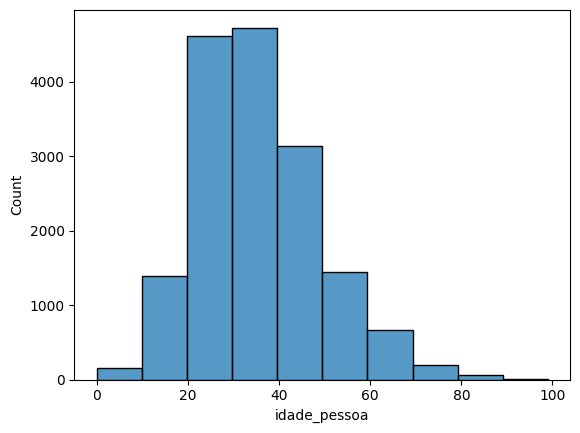

In [25]:
sns.histplot(df_idade_notna['idade_pessoa'], bins=10)

### Cor da vítima
A variável descreve a cor da vítime do crime de homicídio
##### Tratamentos
1. Valores cadastrados de formas deferentes (Preta => preta)
##### Comentários
- A variável possui uma grande volumetria em Via pública
- Alto preenchimento da coluna, apenas 6 linhas com NULLs

In [26]:
## Tratrando coluna 
df_2['cor_pele'].loc[df_2['cor_pele'].str.contains("pre")==True] = 'Preta'

C:\Users\gabriel\AppData\Local\Temp\ipykernel_2348\2618161973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cor_pele'].loc[df_2['cor_pele'].str.contains("pre")==True] = 'Preta'


In [27]:
df_2['cor_pele'].describe()

count      18442
unique         7
top       Branca
freq        8504
Name: cor_pele, dtype: object

In [28]:
# Valores NULLS
df_2['cor_pele'].isna().value_counts()

cor_pele
False    18442
True         3
Name: count, dtype: int64

In [29]:
# Quantidade por valor
df_2['cor_pele'].value_counts()

cor_pele
Branca      8504
Parda       7714
Preta       1580
Ignorada     493
Outros       111
Amarela       36
Vermelha       4
Name: count, dtype: int64

### Tipo da pessoa
A variável descreve a cor da vítime do crime de homicídio
##### Tratamentos
1. Valores cadastrados de formas deferentes (Vitíma => 'Vitima  ')

In [30]:
df_2['tp_pessoa'].describe()

count      18445
unique        16
top       Vítima
freq       17812
Name: tp_pessoa, dtype: object

In [31]:
df_2['tp_pessoa'].isna().value_counts()

tp_pessoa
False    18445
Name: count, dtype: int64

In [32]:
df_2['tp_pessoa'].value_counts()

tp_pessoa
Vítima                  17812
Autor/Vitima              531
Encontro de Cadáver        32
Adolescente Inf/Vit        26
Desaparecido               10
Indiciado                   9
Encontrado                  8
Vítima                      4
Autor                       3
Adolescente                 2
Adolescente infrator        2
vítima                      2
Vítima de Suicídio          1
Criança                     1
Partes                      1
Investigado                 1
Name: count, dtype: int64

<Axes: ylabel='tp_pessoa'>

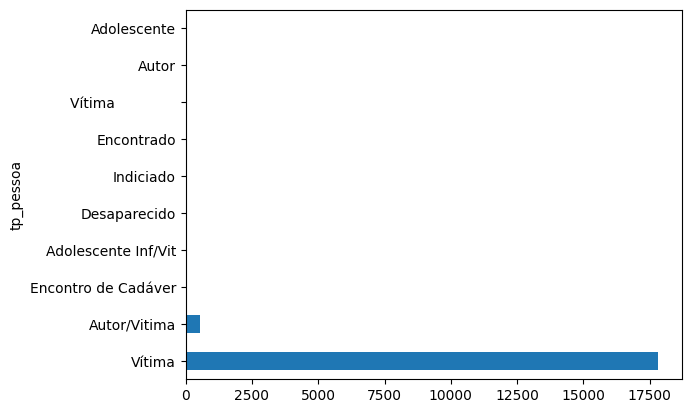

In [33]:
df_2['tp_pessoa'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh')

### Natureza Apurada
A variável descreve a natureza do crime, sendo a base de homicídios temos apenas essa opção

In [34]:
df_2['natureza_apurada'].value_counts()

natureza_apurada
HOMICÍDIO DOLOSO    18445
Name: count, dtype: int64

### Ano estatística
A variável descreve o ano dos fatos ocorridos

<Axes: xlabel='ano_estatistica'>

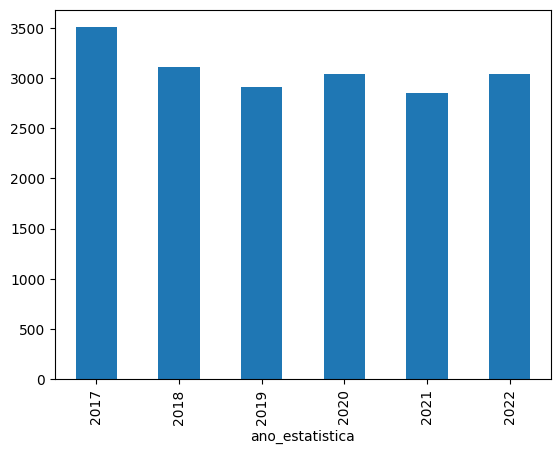

In [35]:
df_ordenado_anomes = df_2.sort_values('ano_estatistica',key=lambda x: pd.to_datetime(x, format='%Y'))
df_ordenado_anomes.groupby('ano_estatistica').size().plot(kind='bar')

### Mês estatística
A variável descreve o mês em formato numérico dos fatos ocorridos

In [36]:
df_2['mes_estatistica'].describe()

count    18445.000000
mean         6.493413
std          3.535491
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: mes_estatistica, dtype: float64

In [37]:
df_2['mes_estatistica'].isna().value_counts()

mes_estatistica
False    18445
Name: count, dtype: int64

In [38]:
## Observando o mês x ano que mais ocorreram homicídios
pd.crosstab(df_2['ano_estatistica'], df_2['mes_estatistica'])

mes_estatistica,1,2,3,4,5,6,7,8,9,10,11,12
ano_estatistica,,,,,,,,,,,,
2017,310,312,320,303,273,258,283,265,272,268,294,346
2018,277,246,281,271,248,247,261,233,232,264,257,289
2019,284,219,255,262,223,222,193,210,212,261,255,310
2020,277,218,297,272,236,222,223,225,248,256,277,287
2021,295,239,249,229,267,207,215,235,243,229,225,214
2022,250,246,246,237,240,235,274,240,270,283,229,294


### Seccional Circunscricao
A variável descreve a delegacia responsável pela investigação do crime
#### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

In [39]:
df_2['seccional_circunscricao'].describe()

count      18445
unique        71
top       6ª SEC
freq        1044
Name: seccional_circunscricao, dtype: object

In [40]:
df_2['seccional_circunscricao'].isna().value_counts()

seccional_circunscricao
False    18445
Name: count, dtype: int64

In [41]:
df_2['seccional_circunscricao'].value_counts().head(15)

seccional_circunscricao
6ª SEC                   1044
SEC Carapicuíba           763
SEC Sorocaba              720
4ª SEC                    713
SEC Mogi das Cruzes       632
3ª SEC                    615
SEC Guarulhos             614
2ª Seccional Campinas     599
SEC Americana             560
8ª SEC                    556
SEC Santo André           501
SEC Santos                493
SEC Taboão da Serra       479
SEC Taubaté               475
7ª SEC                    452
Name: count, dtype: int64

<Axes: ylabel='count'>

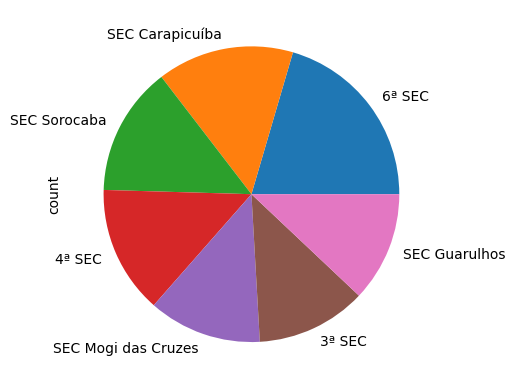

In [42]:
df_2['seccional_circunscricao'].value_counts().head(7).sort_values(ascending=False).plot.pie()

### Municipio Circunscricao
A variável descreve o municipio onde está localizado a Delegacia de polícia responsável pela investigação do crime
##### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

In [43]:
df_2['municipio_circunscricao'].describe()

count         18445
unique          572
top       São Paulo
freq           4080
Name: municipio_circunscricao, dtype: object

In [44]:
df_2['municipio_circunscricao'].isna().value_counts()

municipio_circunscricao
False    18445
Name: count, dtype: int64

In [45]:
df_2['municipio_circunscricao'].value_counts().head(15)

municipio_circunscricao
São Paulo                4080
Campinas                  798
Guarulhos                 543
Sorocaba                  294
Osasco                    293
Ribeirão Preto            285
São Bernardo do Campo     263
São José dos Campos       262
Santo André               246
Taubaté                   240
São José do Rio Preto     199
Mauá                      198
Itaquaquecetuba           195
Carapicuíba               189
Jacareí                   177
Name: count, dtype: int64

### DP Circunscricao
A variável descrive a delegacia de policia responsável pela investigação do crime
##### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

In [46]:
df_2['dp_circunscricao'].describe()

count                 18445
unique                  964
top       009 DP - Campinas
freq                    224
Name: dp_circunscricao, dtype: object

In [47]:
df_2['dp_circunscricao'].isna().value_counts()

dp_circunscricao
False    18445
Name: count, dtype: int64

In [48]:
df_2['dp_circunscricao'].value_counts().head(15)

dp_circunscricao
009 DP - Campinas                224
011 DP - Campinas                190
100 DP - Jardim Herculano        181
DM - Itapevi                     173
047 DP - Capão Redondo           167
037 DP - Campo Limpo             159
025 DP - Parelheiros             150
073 DP - Jaçanã                  142
007 DP - Guarulhos               137
003 DP - Taubaté                 118
006 DP - Santo André             116
092 DP - Parque Santo Antônio    115
DM - Itaquaquecetuba             114
004 DP - Guarulhos               111
046 DP - Perus                   110
Name: count, dtype: int64

### Departamento Circunscricao
A variável descreve o departamento responsável pela investigação do crime

In [49]:
df_2['departamento_circunscricao'].describe()

count     18445
unique       12
top       DECAP
freq       4080
Name: departamento_circunscricao, dtype: object

In [50]:
df_2['departamento_circunscricao'].isna().value_counts()

departamento_circunscricao
False    18445
Name: count, dtype: int64

In [51]:
df_2['departamento_circunscricao'].value_counts()

departamento_circunscricao
DECAP         4080
DEMACRO       4021
DEINTER 1     2017
DEINTER 2     1547
DEINTER 3     1405
DEINTER 9     1321
DEINTER 7     1142
DEINTER 6      953
DEINTER 4      635
DEINTER 5      540
DEINTER 10     426
DEINTER 8      358
Name: count, dtype: int64

### Logradouro
A variável descreve o logradouro onde ocorreu crime de homicídio 
##### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

##### Comentários
A variável possui valores aparentetemente com cadastramento errado como por exemplo: DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS

In [52]:
df_2['logradouro'].describe()

count                                             18445
unique                                            10545
top       DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS 
freq                                               4262
Name: logradouro, dtype: object

In [53]:
df_2['logradouro'].isna().value_counts()

logradouro
False    18445
Name: count, dtype: int64

In [54]:
df_2['logradouro'].value_counts().head(20)

logradouro
DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS     4262
ESTRADA MUNICIPAL                                  26
ESTRADA DE ITAPECERICA                             22
RODOVIA SP 055                                     21
AVENIDA BRASIL                                     21
AVENIDA TIRADENTES                                 21
RODOVIA SP 270                                     20
RODOVIA BR 381                                     20
RODOVIA BR 116                                     19
RUA DO RETIRO                                      17
AVENIDA CORONEL SEZEFREDO FAGUNDES                 16
RUA UM                                             15
RUA GERVASIO LEITE REBELO                          15
RODOVIA PRESIDENTE DUTRA (BR 116)                  15
RUA DOIS                                           14
ESTRADA GUARULHOS-NAZARÉ                           14
RUA RIO DE JANEIRO                                 13
RODOVIA SP 160                                     13
AVENIDA SAPOPEMBA

### Número do Logradouro
Variável contendo o número do logradouro onde ocorreu crime de homicídio 



##### Comentários
Existem números como "9999.0" que podem ser considerados com "faltantes"

In [55]:
df_2['num_logradouro'].describe()

count     14160.0
unique     2063.0
top           1.0
freq       1698.0
Name: num_logradouro, dtype: float64

In [56]:
df_2['num_logradouro'].isna().value_counts()

num_logradouro
False    14160
True      4285
Name: count, dtype: int64

In [57]:
df_2['num_logradouro'].value_counts().head(20)

num_logradouro
1.0        1698
0.0        1134
100.0       527
10.0        378
1000.0       91
200.0        88
50.0         85
15.0         80
2.0          66
20.0         65
99999.0      63
12.0         57
5.0          57
300.0        55
40.0         55
500.0        51
150.0        51
80.0         47
3.0          47
30.0         47
Name: count, dtype: int64

### Descrição do tipo local
A variável descreve o local do crime ocorrido
##### Tratamentos
1. Valores cadastrados de formas deferentes (Via pública => via publica..)
2. Possívelmente retirar espaços em ltrim() e rtrim()
##### Comentários
A variável possui uma grande volumetria em Via pública e cerca de 6 linhas nulas

In [58]:
df_2['desc_tipo_local'].describe()

count           18439
unique             34
top       Via pública
freq            10223
Name: desc_tipo_local, dtype: object

In [59]:
df_2['desc_tipo_local'].isna().value_counts()

desc_tipo_local
False    18439
True         6
Name: count, dtype: int64

In [60]:
df_2['desc_tipo_local'].value_counts()

desc_tipo_local
Via pública                                 10223
Residência                                   3873
Area não ocupada                              953
Unidade rural                                 712
Comércio e serviços                           542
Saúde                                         496
Restaurante e afins                           483
Rodovia/Estrada                               311
Lazer e recreação                             172
Condominio Residencial                        153
Favela                                         85
Serviços e bens públicos                       63
Hospedagem                                     58
Estabelecimento prisional                      54
Terminal/Estação                               45
Repartição Pública                             30
Estrada de ferro                               27
Centro Comerc./Empresarial                     27
Templo e afins                                 26
Local clandestino/ilegal          

In [61]:
## Tratrando coluna 
df_2['desc_tipo_local'].loc[df_2['desc_tipo_local'].str.contains("Via p")==True] = 'Via pública'

C:\Users\gabriel\AppData\Local\Temp\ipykernel_2348\2806489551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['desc_tipo_local'].loc[df_2['desc_tipo_local'].str.contains("Via p")==True] = 'Via pública'


<Axes: ylabel='count'>

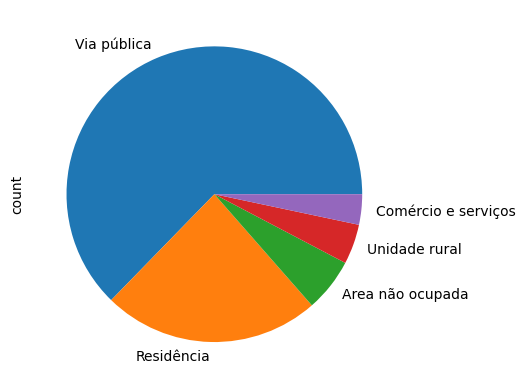

In [62]:
df_2['desc_tipo_local'].value_counts().head(5).sort_values(ascending=False).plot.pie()

### Latitude e Longitude
A Latitude e Longitude do endereço onde ocorreu o crime

##### Comentários
A maior ocorrencia de crimes de homiícios está concentrado na capital de são paulo

In [63]:
df_2[['latitude','longitude']].describe()

,latitude,longitude
count,13284.000000,13285.000000
mean,-23.064318,-47.043922
std,0.885189,1.291568
min,-25.013276,-52.946693
25%,-23.613530,-47.317517
50%,-23.453261,-46.754598
75%,-22.799955,-46.476308
max,0.000000,0.000000


<Axes: xlabel='longitude', ylabel='latitude'>

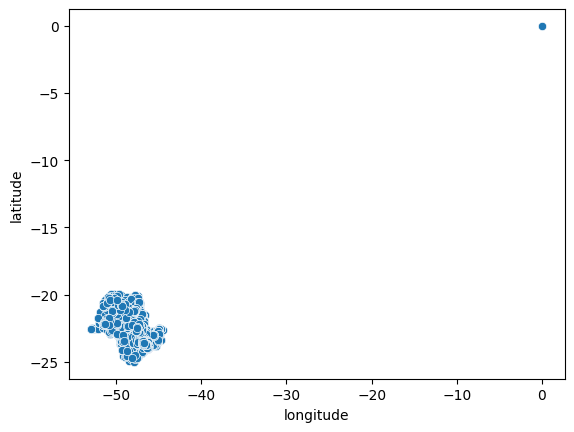

In [64]:
sns.scatterplot(x = df_2['longitude'], y=df_2['latitude'])

In [65]:
df_2_sem_outlier = df_2[(df_2['longitude'] != 0) & (df_2['latitude'] != 0)]

<Axes: xlabel='longitude', ylabel='latitude'>

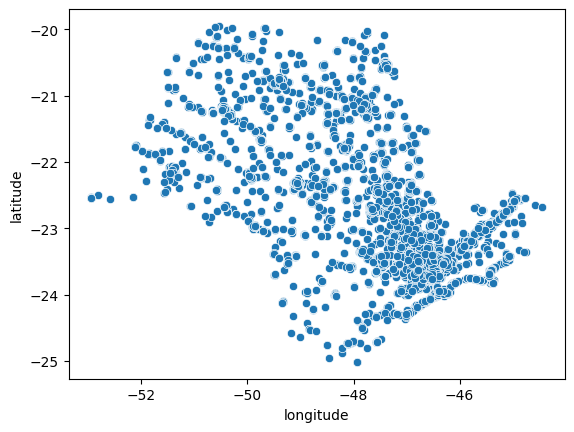

In [66]:
sns.scatterplot(x = df_2_sem_outlier['longitude'], y = df_2_sem_outlier['latitude'])

### DP da Elaboração
Delegacia de policia responsável pela elaboração do B.O do crime

##### Comentários
1. O Municipio, secretaria, departamento e dp são as mesmas que são emitidas o BO (circunscricao)

In [67]:
df_2['dp_elaboracao'].describe()

count                    18445
unique                     984
top       DHPP DIV. HOMICIDIOS
freq                       514
Name: dp_elaboracao, dtype: object

In [68]:
df_2['dp_elaboracao'].isna().value_counts()

dp_elaboracao
False    18445
Name: count, dtype: int64

<Axes: ylabel='dp_elaboracao'>

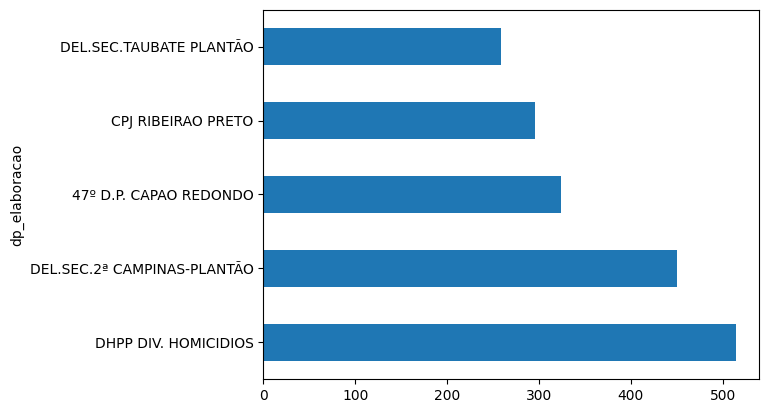

In [69]:
df_2['dp_elaboracao'].value_counts().head(5).sort_values(ascending=False).plot(kind='barh')

In [70]:
pd.crosstab(df_2['dp_elaboracao'], df_2['dp_circunscricao']).head(10)

dp_circunscricao,001 DP - Adamantina,001 DP - Americana,001 DP - Amparo,001 DP - Andradina,001 DP - Araraquara,001 DP - Araras,001 DP - Araçatuba,001 DP - Assis,001 DP - Atibaia,001 DP - Avaré,001 DP - Barretos,001 DP - Barueri,001 DP - Batatais,001 DP - Bauru,001 DP - Bebedouro,...,DM - Valinhos,DM - Valparaiso,DM - Vargem,DM - Vargem Grande Paulista,DM - Vargem Grande do Sul,DM - Vera Cruz,DM - Vinhedo,DM - Viradouro,DM - Vista Alegre/Alto,DM - Votorantim,DM - Várzea Pta.,DM - Zacarias,DM - Águas de Lindóia,DM - Álvares Machado,Delegacia Aeroporto Int. SP - Guarulhos
dp_elaboracao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01ª DDM CENTRO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01ª DEL. SEC. CAMPINAS - SHPP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. AMERICANA,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. ANDRADINA,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. ARARAQUARA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. BARUERI,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. BIRIGUI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. BOTUCATU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. CABREÚVA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
